### Problem Statement
X Education company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.  
Help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

### Goals of the Case Study
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Importing Python Libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Importing warnings
import warnings
warnings.filterwarnings("ignore")

### Reading Data

In [2]:
#Reading source data
lead = pd.read_csv("D:\csv files for DA\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspecting data

In [3]:
lead.shape

(9240, 37)

In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Summary of the dataset
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Cleaning

In [6]:
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [7]:
lead.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1,inplace=True)

We have dropped the columns with single variable. Since we won't need them in our Analysis.

### Checking Duplicates

In [8]:
sum(lead.duplicated(subset = ['Prospect ID','Lead Number'])) == 0

True

In [9]:
lead.drop(['Prospect ID'], 1, inplace = True)

ID is removed since it won't be needed for our analysis.

In [10]:
lead = lead.replace('Select', np.nan)

We have come across 'select' values which we replaced them with nan.

In [11]:
lead.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [12]:
# Percentage of null values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [13]:
lead.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Lead Quality','How did you hear about X Education'],axis=1,inplace=True)


Dropped few columns with missing values greater than 40%

### Data Imputation

The most simple technique of all is to replace missing data with some constant value. The value can be any number that seemed appropriate.

It is important to keep in mind that imputing missing values with summary statistics like mean, median, or mode can introduce bias in the data, as it assumes that the missing values are similar to the non-missing values. Additionally, the choice of imputation method can also affect the performance of the machine learning model, as it can impact the relationships between variables in the dataset.



In [14]:
lead['Country']=lead['Country'].replace(np.nan,'India')

In [15]:
lead['Specialization']=lead['Specialization'].replace(np.nan,'unknown')

In [16]:
lead['City']=lead['City'].replace(np.nan,'unknown')

In [17]:
lead["What is your current occupation"].fillna(lead["What is your current occupation"].mode()[0],inplace=True)

In [18]:
lead["What matters most to you in choosing a course"].fillna(lead["What matters most to you in choosing a course"].mode()[0],inplace=True)

In [19]:
lead['Tags']=lead['Tags'].replace(np.nan,'unknown')

In [20]:
lead['TotalVisits'] = lead['TotalVisits'].fillna(0.0)

In [21]:
lead['TotalVisits']=lead['TotalVisits'].astype(int)

In [22]:
lead['Lead Source'] = lead['Lead Source'].fillna('Google')
lead['Page Views Per Visit'] = lead['Page Views Per Visit'].fillna(0.00)
lead['Last Activity'] = lead['Last Activity'].fillna('Email Opened')

In [23]:
lead['Page Views Per Visit']=lead['Page Views Per Visit'].astype(int)

In [24]:
# checking for null values percentage
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

# EDA

## Univariate Analysis

In [25]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Number                                    9240 non-null   int64 
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9240 non-null   object
 3   Do Not Email                                   9240 non-null   object
 4   Do Not Call                                    9240 non-null   object
 5   Converted                                      9240 non-null   int64 
 6   TotalVisits                                    9240 non-null   int32 
 7   Total Time Spent on Website                    9240 non-null   int64 
 8   Page Views Per Visit                           9240 non-null   int32 
 9   Last Activity                                  9240 non-null   

### 1 Categorical variables

In [26]:
lead=lead.set_index('Lead Number')

In [27]:
# Creating the lists of numerical columns and categorical columns seperately.
col_obj=list(lead.loc[:, lead.dtypes == np.object].columns)
col_num=list(lead.loc[:, lead.dtypes == np.int64].columns)
col_num+=(list(lead.loc[:, lead.dtypes == np.int32].columns))
col_num+=(list(lead.loc[:, lead.dtypes == np.number].columns))
print('columns with object dtype \n {} \n \n columns with number dtype \n {}'.format(col_obj,col_num))

columns with object dtype 
 ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity'] 
 
 columns with number dtype 
 ['Converted', 'Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit']


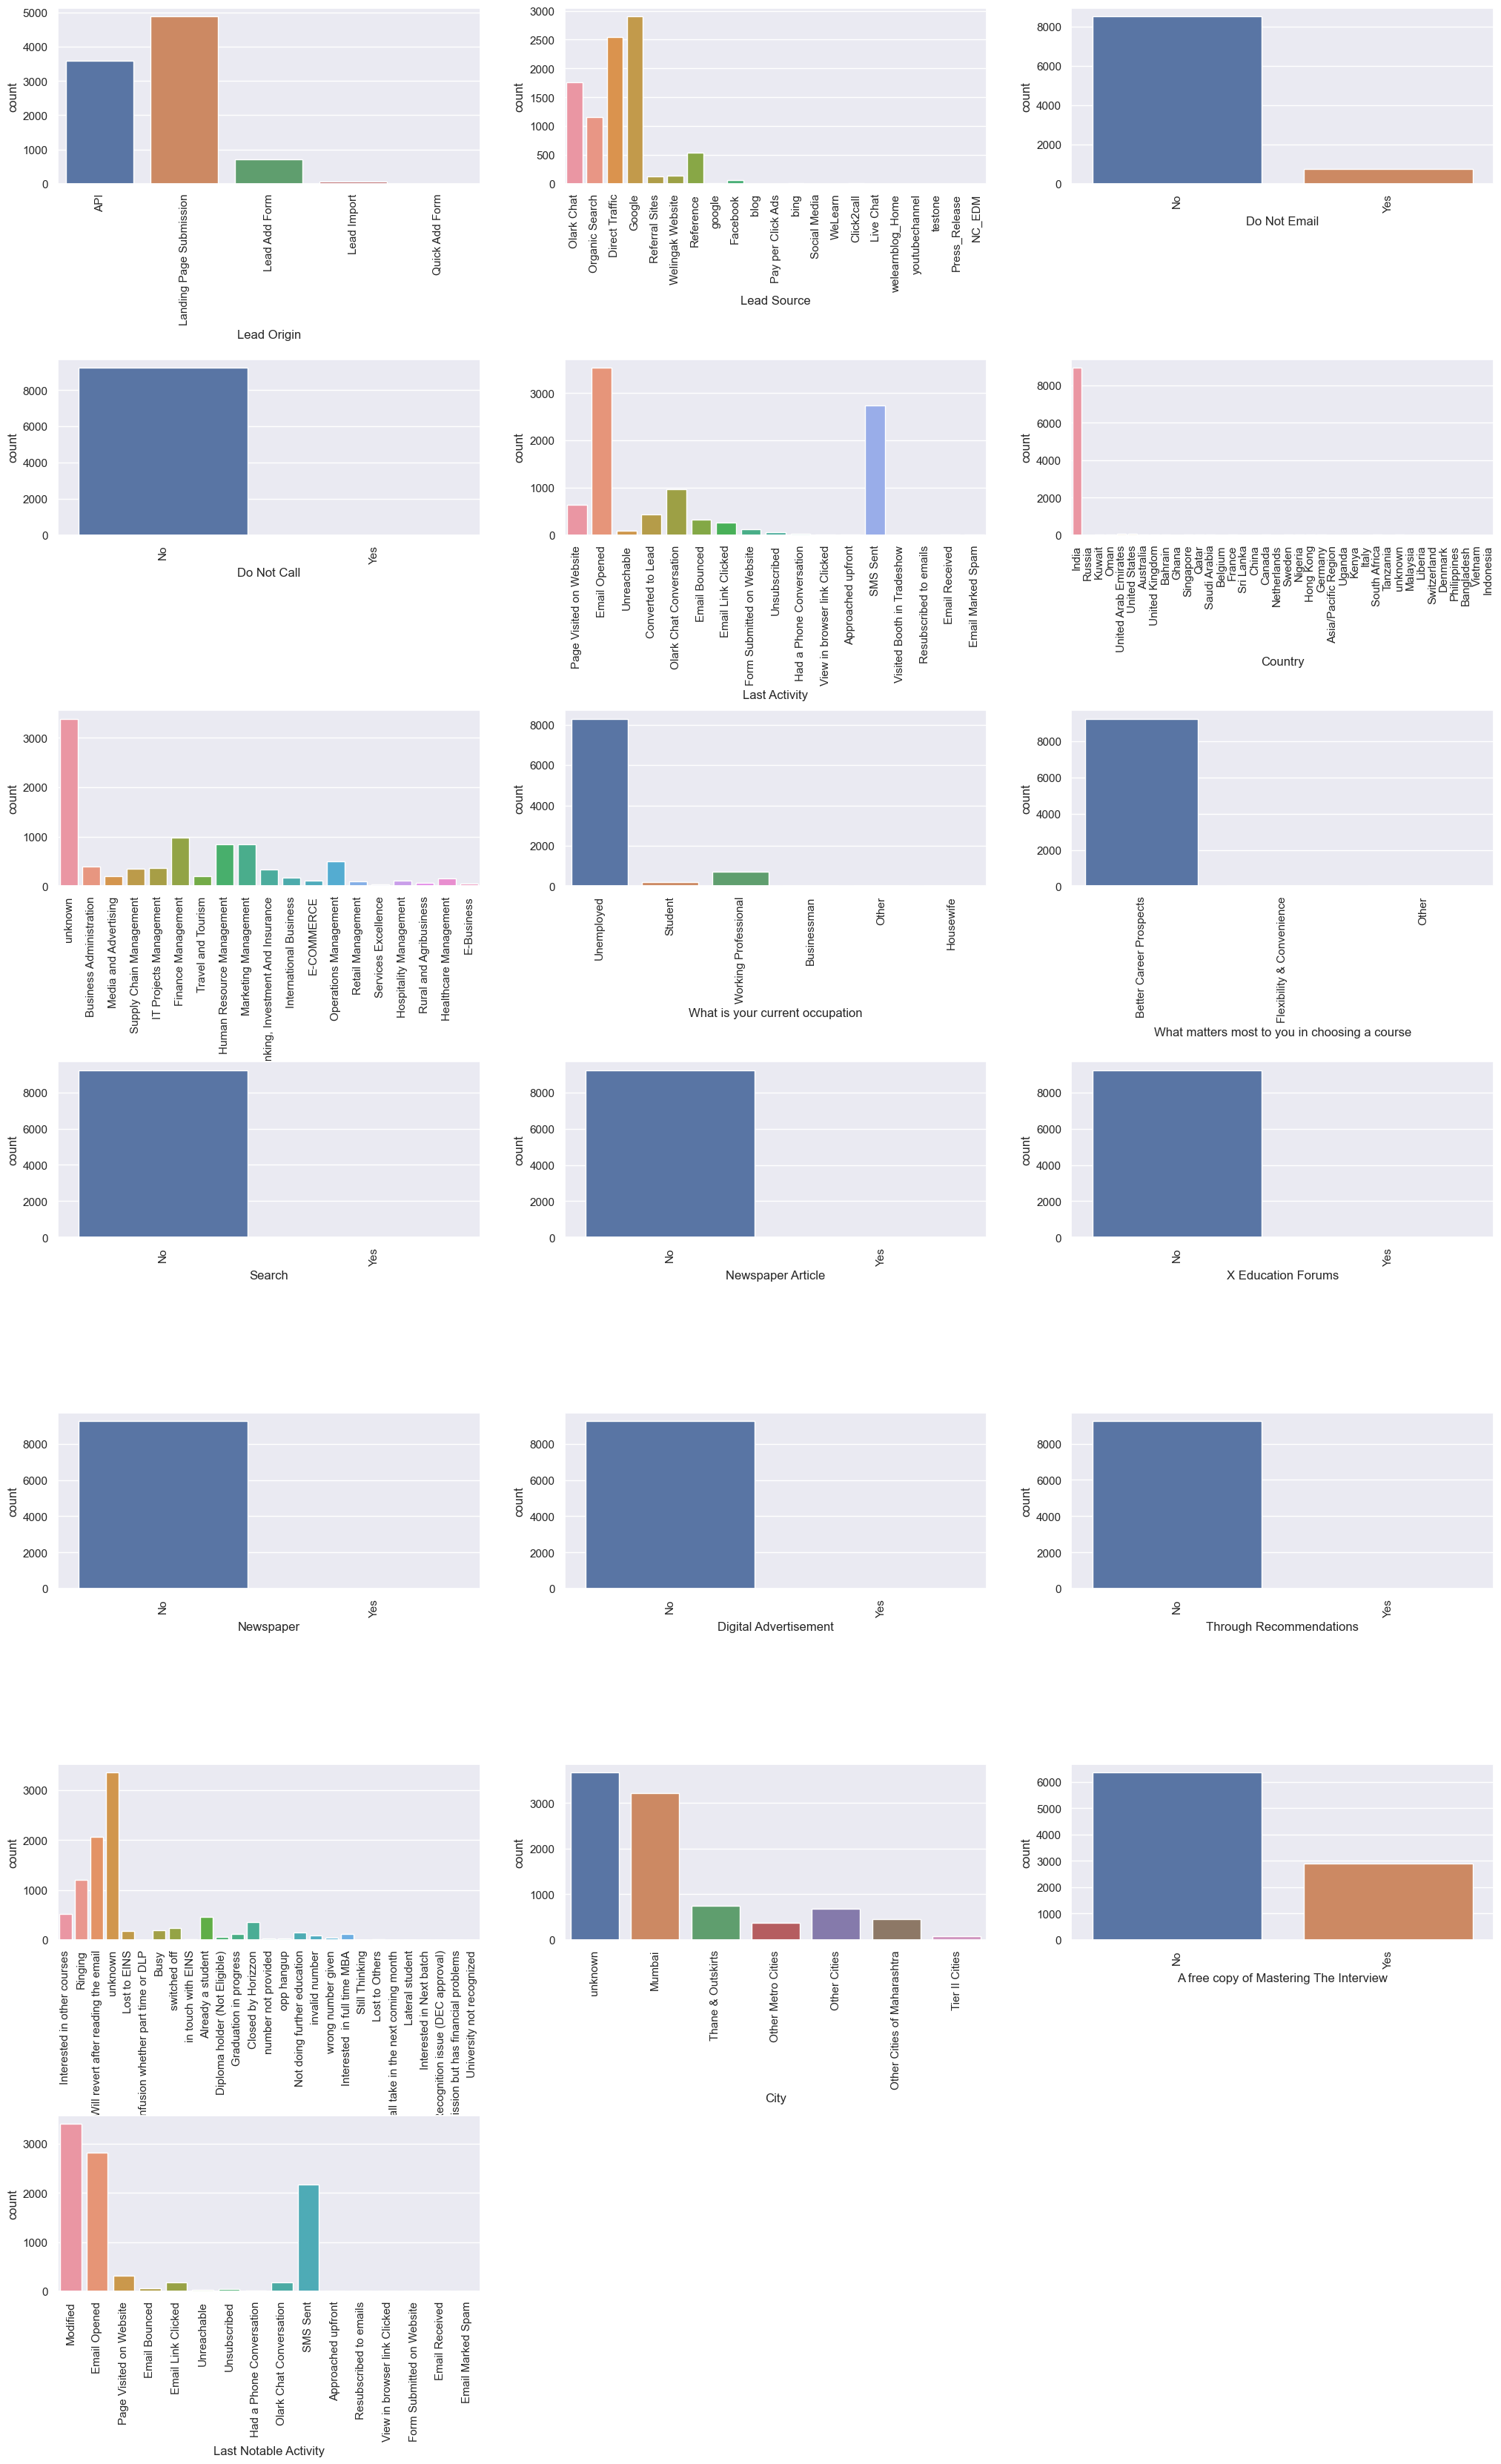

In [28]:
# Plotting countplots for categorical data
plt.figure(figsize=(25,40))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1 )
for i in enumerate(col_obj):
    plt.subplot(7,3, i[0]+1)
    sns.countplot(x=i[1],data=lead) 
    plt.xticks(rotation=90)
plt.show()


From the plots above, we have inferred that  
  - There are graphs which has only one values.We can remove those graphs since they won't be helpful for our model building.
  - We can impute the remaining columns accordingly.

In [29]:
#Drpping the single value columns
lead = lead.drop(['What is your current occupation','Do Not Call','Do Not Email','Country',\
                  'What matters most to you in choosing a course','Search','Newspaper Article',\
                  'X Education Forums','Newspaper','Through Recommendations','Digital Advertisement'],axis=1)

In [30]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Lead Origin                             9240 non-null   object
 1   Lead Source                             9240 non-null   object
 2   Converted                               9240 non-null   int64 
 3   TotalVisits                             9240 non-null   int32 
 4   Total Time Spent on Website             9240 non-null   int64 
 5   Page Views Per Visit                    9240 non-null   int32 
 6   Last Activity                           9240 non-null   object
 7   Specialization                          9240 non-null   object
 8   Tags                                    9240 non-null   object
 9   City                                    9240 non-null   object
 10  A free copy of Mastering The Interview  9240 non-null   object
 1

#### Checking the target variable

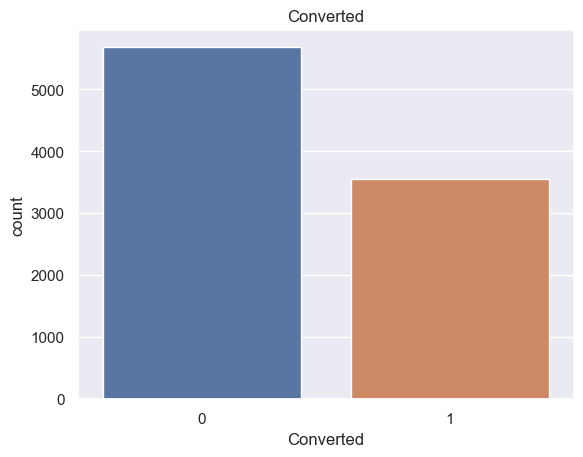

In [31]:
sns.countplot(x=lead['Converted'])
plt.title('Converted')
plt.show()

 From the total of 9240 rows of people, nearly 5700 people have not joined any course and nearly 3500 people have joined the courses in X-Education.

### 2 Numerical Variables


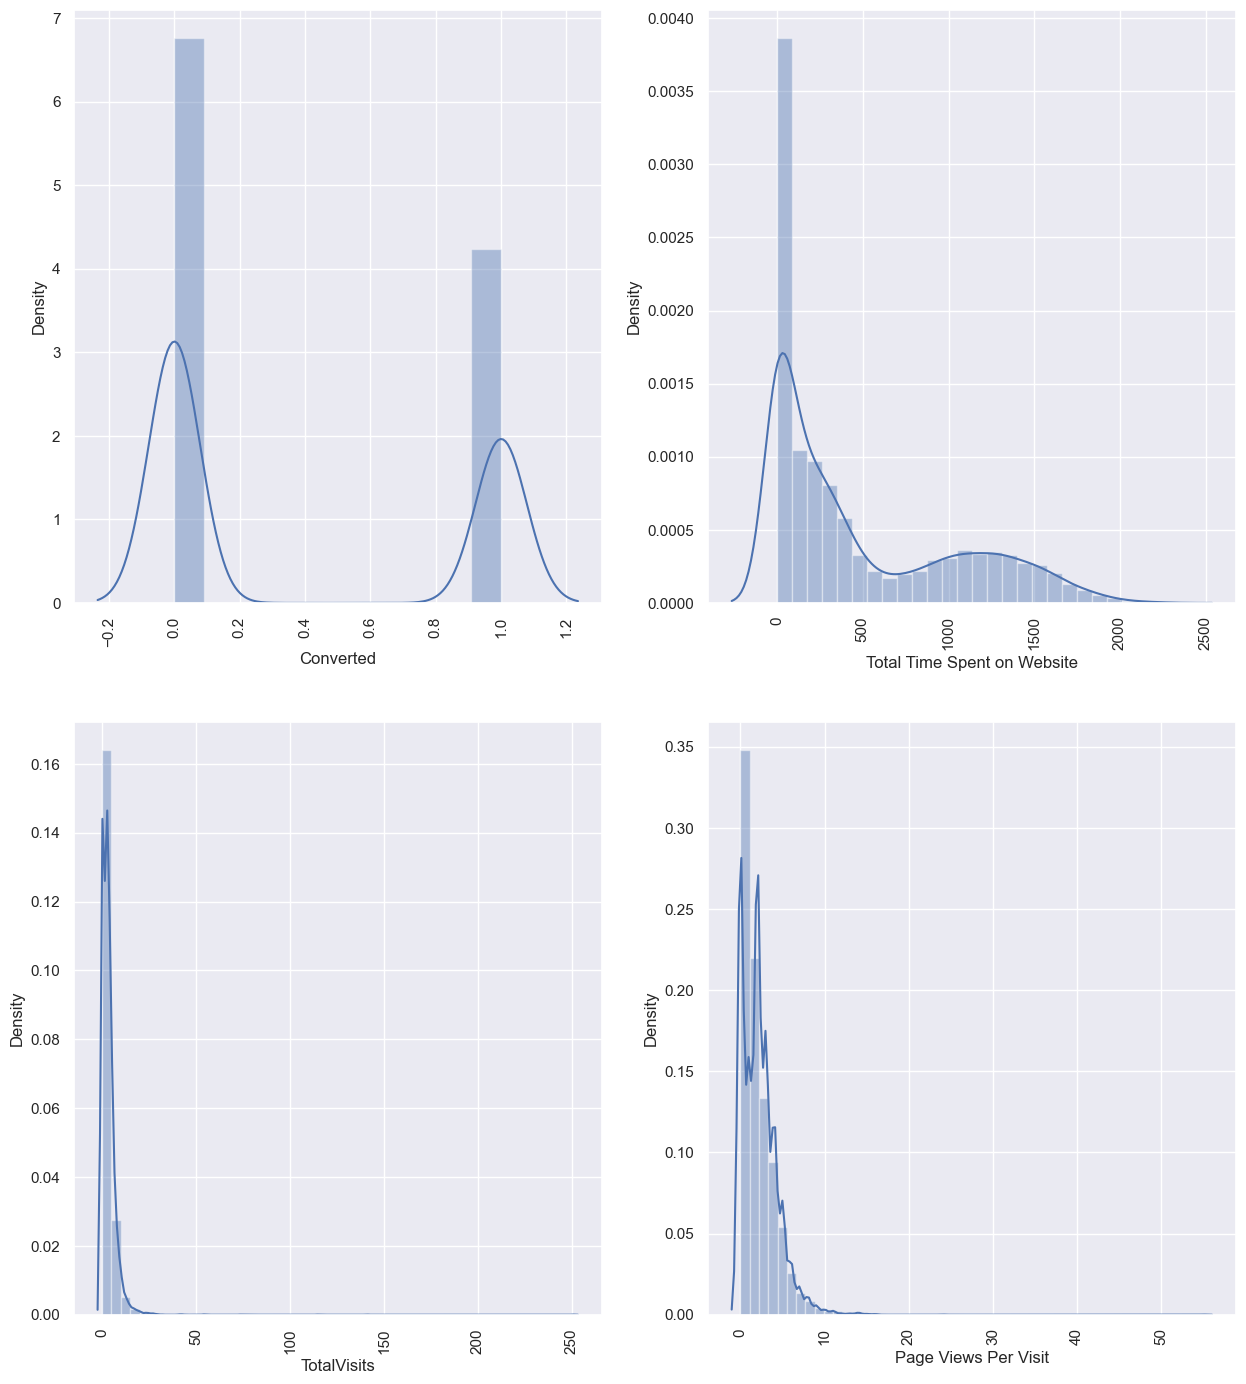

In [32]:
# PLotting distribution plot for all the numerical data
plt.figure(figsize=(15,15))
plt.subplots_adjust(bottom=.01)
for i in enumerate(col_num):
    plt.subplot(2,2, i[0]+1)
    sns.distplot(lead[i[1]])
    plt.xticks(rotation=90)
plt.show()

From the graphs,  
 - Converted column is our target variable, we can leave that alone.
 - None of the Continueous Variables are in Normal distribution
 - There is clearly a presence of Outliers in Total Visits and Page Views Per Visit


## Bivariate Analysis

In [33]:
col_obj1=list(lead.loc[:, lead.dtypes == np.object].columns)

#### Plotting various categorical columns with respect to target column(Converted)

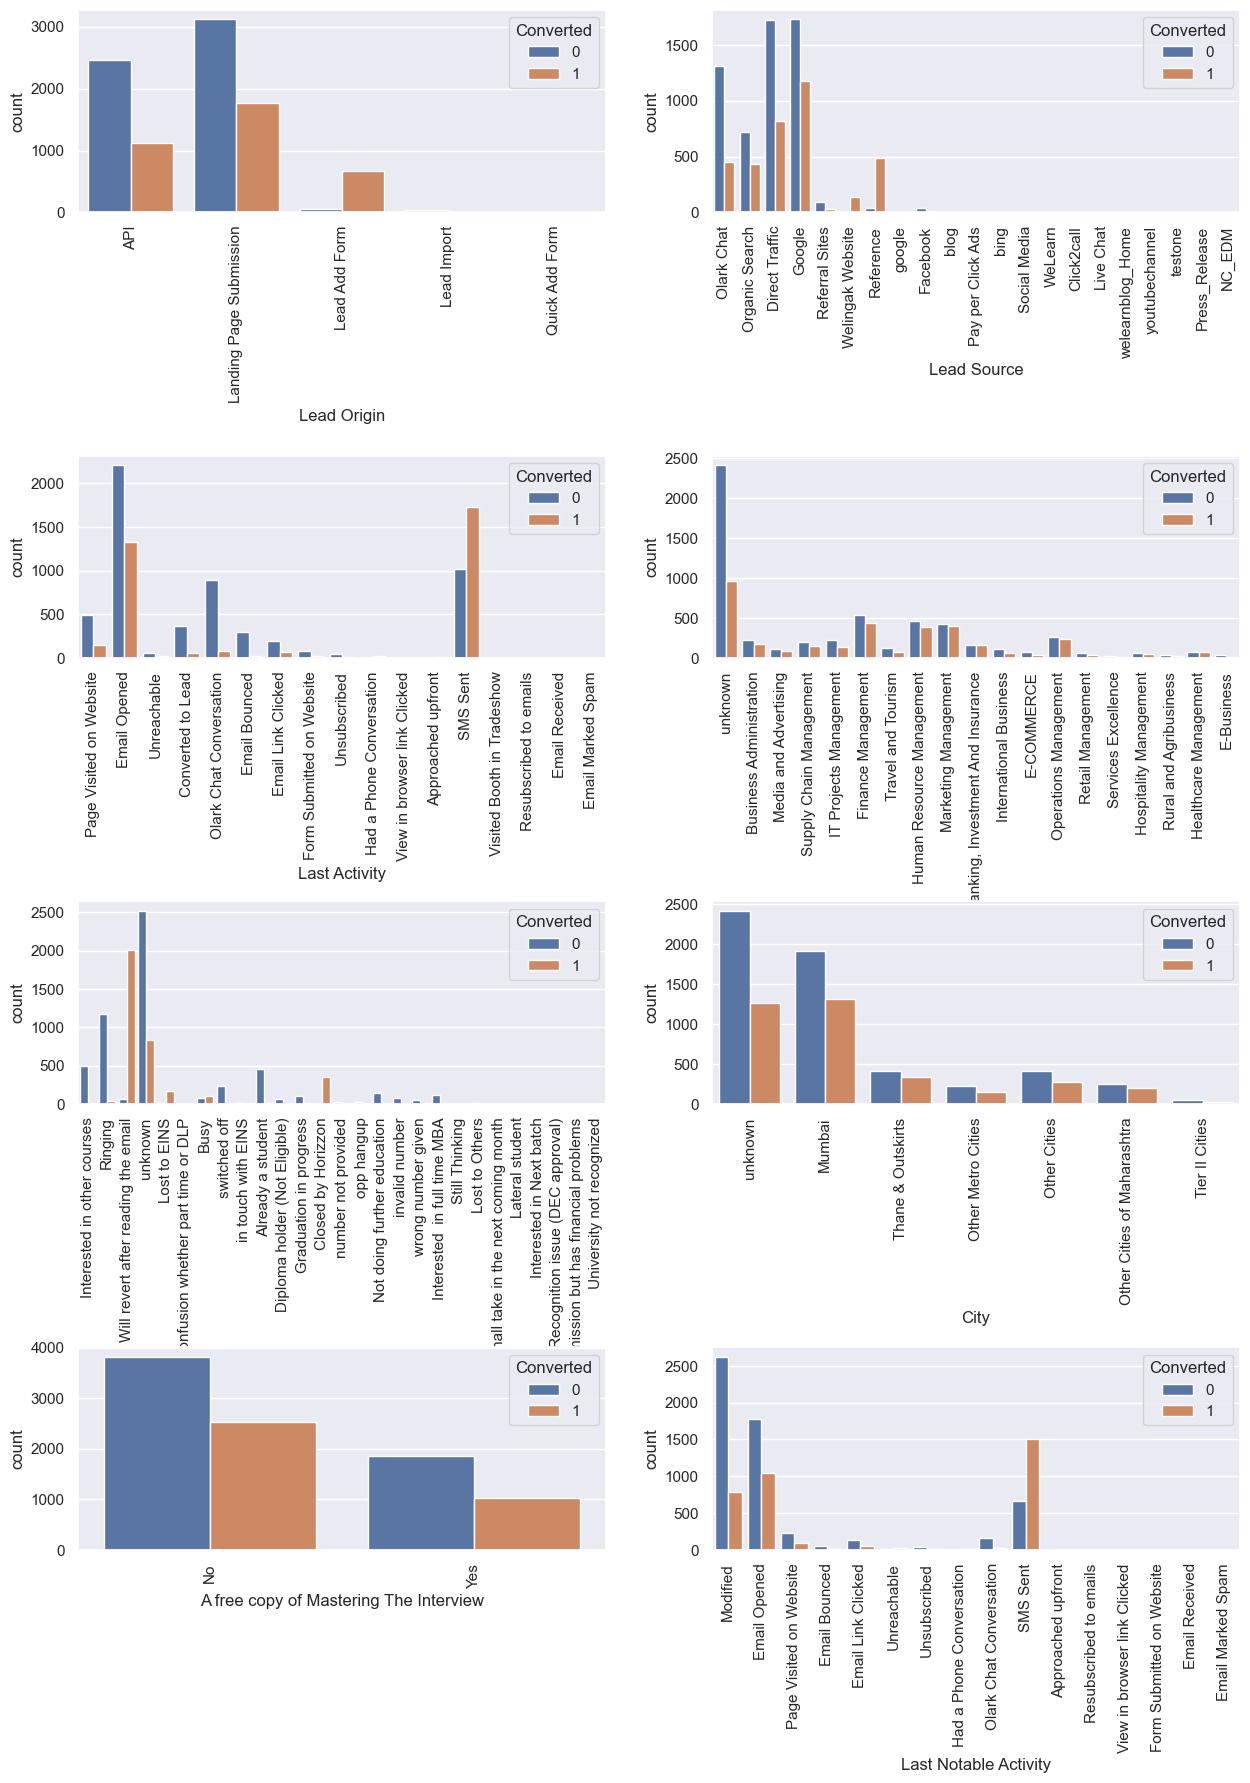

In [34]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(col_obj1):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(x = i[1],hue = 'Converted', data = lead)
    plt.xticks(rotation=90)
plt.show()


Insights we inferred from the above plots:  
- Most of the customers are identified as lead through landing page submission through which lots of people became leads.
- The number of Hot leads is higher in Direct Traffic and Google as lead source and less in Other Category
- Coming to the activities, The number of Hot leads is higher in SMS and in EMAIL cold leads is higher than hot leads.
- Management professions like Finance, HR, Marketing and Operations have very good count of conversion compared to other specializations.

#### Merging all low frequency variables into a single variable

In [35]:
lead['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [36]:
#clubbing lower frequency values
lead['Lead Source'] = lead['Lead Source'].replace(['bing','google',
'Click2call','Social Media','Live Chat','youtubechannel','Press_Release','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'],'Others')

In [37]:
lead['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [38]:
lead['Lead Origin'] = lead['Lead Origin'].replace(['Lead Import','Quick Add Form'],'Others')


In [39]:
lead['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [40]:
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation',         
'Approached upfront',               
'View in browser link Clicked',      
'Email Received',                     
'Email Marked Spam',                  
'Visited Booth in Tradeshow',
'Resubscribed to emails'],'Others')

In [41]:
lead['Tags'].value_counts()

unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [42]:
lead['Tags'] = lead['Tags'].replace(['opp hangup',                                            
'number not provided',                                    
'in touch with EINS',                                     
'Lost to Others',                                          
'Still Thinking',                                          
'In confusion whether part time or DLP',                   
'Interested in Next batch',                                
'Want to take admission but has financial problems',       
'Lateral student',                                         
'Shall take in the next coming month',                     
'University not recognized',                               
'Recognition issue (DEC approval)'],'Others')

In [43]:
lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

## Multivariate Analysis

#### Correlations among numerical variables

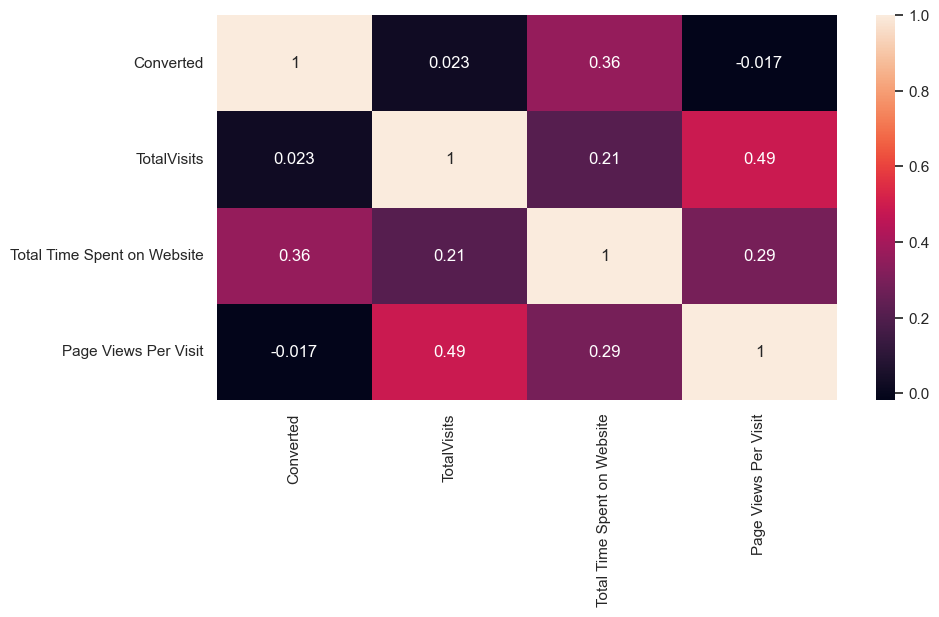

In [44]:
# To check the correlation among variables
plt.figure(figsize=(10,5))
sns.heatmap(lead.corr(), annot = True)
plt.show()

#### Inferences obtained from the heatmap:  
- There is a high correlation (Positive correlation) between target variable and Total Time Spent on Website(0.36).
- There is a high correlation (Negative correlation) between target variable and Page Views Per Visit(-0.017).

### Outlier Analysis

In [45]:
#Checking the spread of values
numeric = lead[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.259632
std,0.486714,4.836682,548.021466,2.167520
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
99%,1.000000,17.000000,1840.610000,9.000000
max,1.000000,251.000000,2272.000000,55.000000


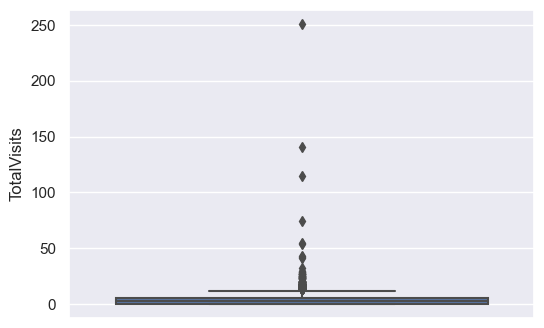

In [46]:
#visualizing spread of variable
#Total Visits
plt.figure(figsize=(6,4))
sns.boxplot(y=lead['TotalVisits'])
plt.show()


There is a presence of outliers in Total Visit.  


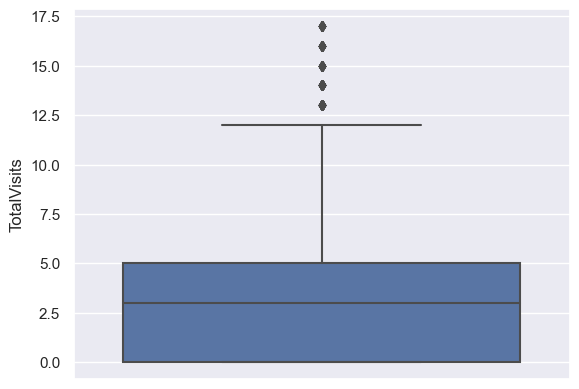

In [47]:
# Remove top & bottom 1% of the Column Outlier values
Q3 = lead.TotalVisits.quantile(0.99)
lead = lead[(lead.TotalVisits <= Q3)]
Q1 = lead.TotalVisits.quantile(0.01)
lead = lead[(lead.TotalVisits >= Q1)]
sns.boxplot(y=lead['TotalVisits'])
plt.show()

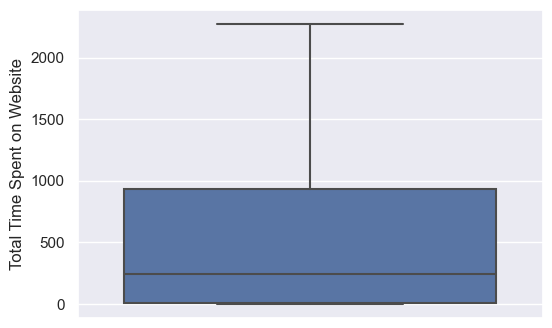

In [48]:
#Total Time Spent on Website
plt.figure(figsize=(6,4))
sns.boxplot(y=lead['Total Time Spent on Website'])
plt.show()

There is no outliers present in Total Time Spent on Website.    


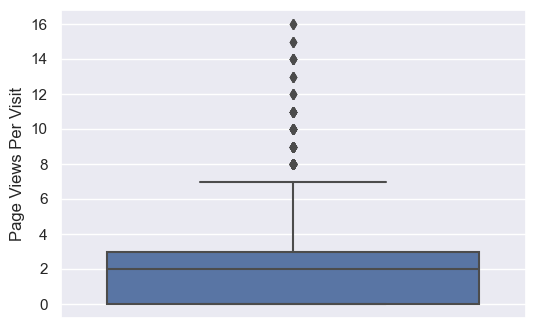

In [49]:
# Page Views Per Visit
plt.figure(figsize=(6,4))
sns.boxplot(y=lead['Page Views Per Visit'])
plt.show()

There is a presence of outliers.

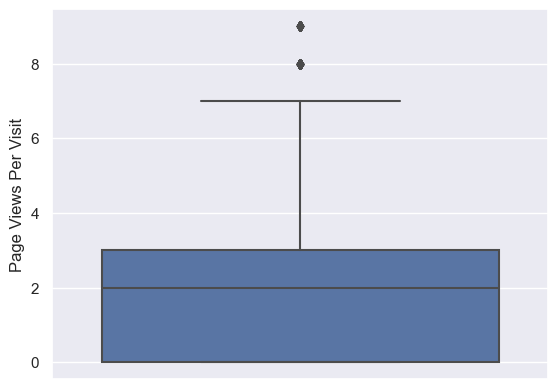

In [50]:
# Remove top & bottom 1% of the Column Outlier values
Q3 = lead['Page Views Per Visit'].quantile(0.99)
lead = lead[lead['Page Views Per Visit'] <= Q3]
Q1 = lead['Page Views Per Visit'].quantile(0.01)
lead = lead[lead['Page Views Per Visit'] >= Q1]
sns.boxplot(y=lead['Page Views Per Visit'])
plt.show()

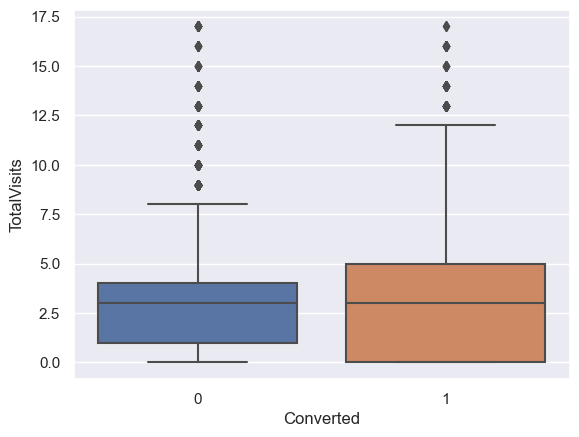

In [51]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)
plt.show()

Median for converted and not converted leads are the close.

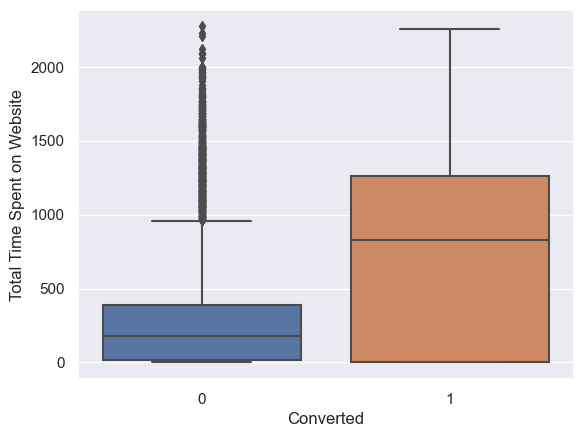

In [52]:
#checking Spread of "Total Time Spent on Website" vs Converted variable
sns.boxplot(x=lead.Converted, y=lead['Total Time Spent on Website'])
plt.show()

- Leads spending more time on the website are more likely to be converted.  
- Website should be made more engaging to make leads spend more time.

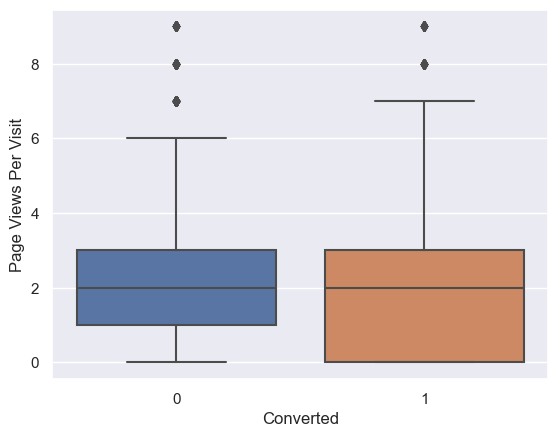

In [53]:
#checking Spread of "Page Views Per Visit" vs Converted variable
sns.boxplot(x=lead.Converted,y=lead['Page Views Per Visit'])
plt.show()

Median is same for both of the cases    
  
    

# Data Preparation

In [54]:
lead[['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization','City',
       'A free copy of Mastering The Interview']].nunique()

Lead Origin                                  4
Lead Source                                  9
Converted                                    2
TotalVisits                                 18
Total Time Spent on Website               1720
Page Views Per Visit                        10
Last Activity                               11
Specialization                              19
City                                         7
A free copy of Mastering The Interview       2
dtype: int64

In [55]:
# Converting binary variables to 0s and 1s.
varlist = ['A free copy of Mastering The Interview']
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
# Applying the function to the list
lead[varlist] = lead[varlist].apply(binary_map)

In [56]:
# Last Notable Activity is similar to last activity, so dropping it.
lead.drop('Last Notable Activity',1,inplace=True)

In [57]:
#Current status of the leads are not neccessary for our modelling.
lead.drop('Tags',1,inplace=True)

## Creating Dummy Variables

In [58]:
# Creating the dummy variable for some categorical variables and dropping the first one
dummy1 = pd.get_dummies(lead[['Lead Origin','City']], drop_first=True)
# Adding the result to the master dataframe
lead = pd.concat([lead,dummy1],1)

In [59]:
# combining Management Specializations because they show similar trends
lead['Specialization'] = lead['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 

In [60]:
# Creating dummy variables for remaining categorical variables and dropping the columns which we consider unneccessary

ls = pd.get_dummies(lead['Lead Source'], prefix  = 'Lead Source')
#Dropping specific columns
ls1 = ls.drop(['Lead Source_Others'], 1)
#Adding the result to the master dataframe
lead = pd.concat([lead, ls1], axis = 1)

la = pd.get_dummies(lead['Last Activity'], prefix  = 'Last Activity')
#Dropping specific columns
la1 = la.drop(['Last Activity_Others'], 1)
#Adding the result to the master dataframe
lead = pd.concat([lead, la1], axis = 1)


In [61]:
# Dropping the original columns
lead.drop(['Lead Origin', 'Lead Source','Last Activity',
       'Specialization','City'],1,inplace = True)

In [62]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,City_Other Cities,City_Other Cities of Maharashtra,...,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
660728,0,5,674,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660727,1,2,1532,2,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660719,0,1,305,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
660681,1,2,1428,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Train-Test Split

#### Importing sklearn 

In [63]:
from sklearn.model_selection import train_test_split
#from sklearn.datasets import make_classification

In [64]:
#Putting Feature variable to X
x=lead.drop('Converted', axis=1)
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,...,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
660728,5,674,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660727,2,1532,2,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660719,1,305,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
660681,2,1428,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [65]:
#Putting response variable to y
y = lead['Converted']
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [66]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
# Numeric columns Scaling
scaler = StandardScaler()

x_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=scaler.fit_transform(x_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,...,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,
657224,1.340545,-0.428736,-0.080064,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
603146,-1.070195,-0.887355,-1.140306,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
649181,0.651762,-0.025151,1.510299,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
591076,0.996153,-0.241619,2.040420,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
628982,0.307371,0.897591,-0.610185,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [69]:
# Checking the converted rate(Class imbalance)
converted=(sum(lead['Converted'])/len(lead['Converted'].index)) *100
converted

38.448844884488445

## Looking at Correlations

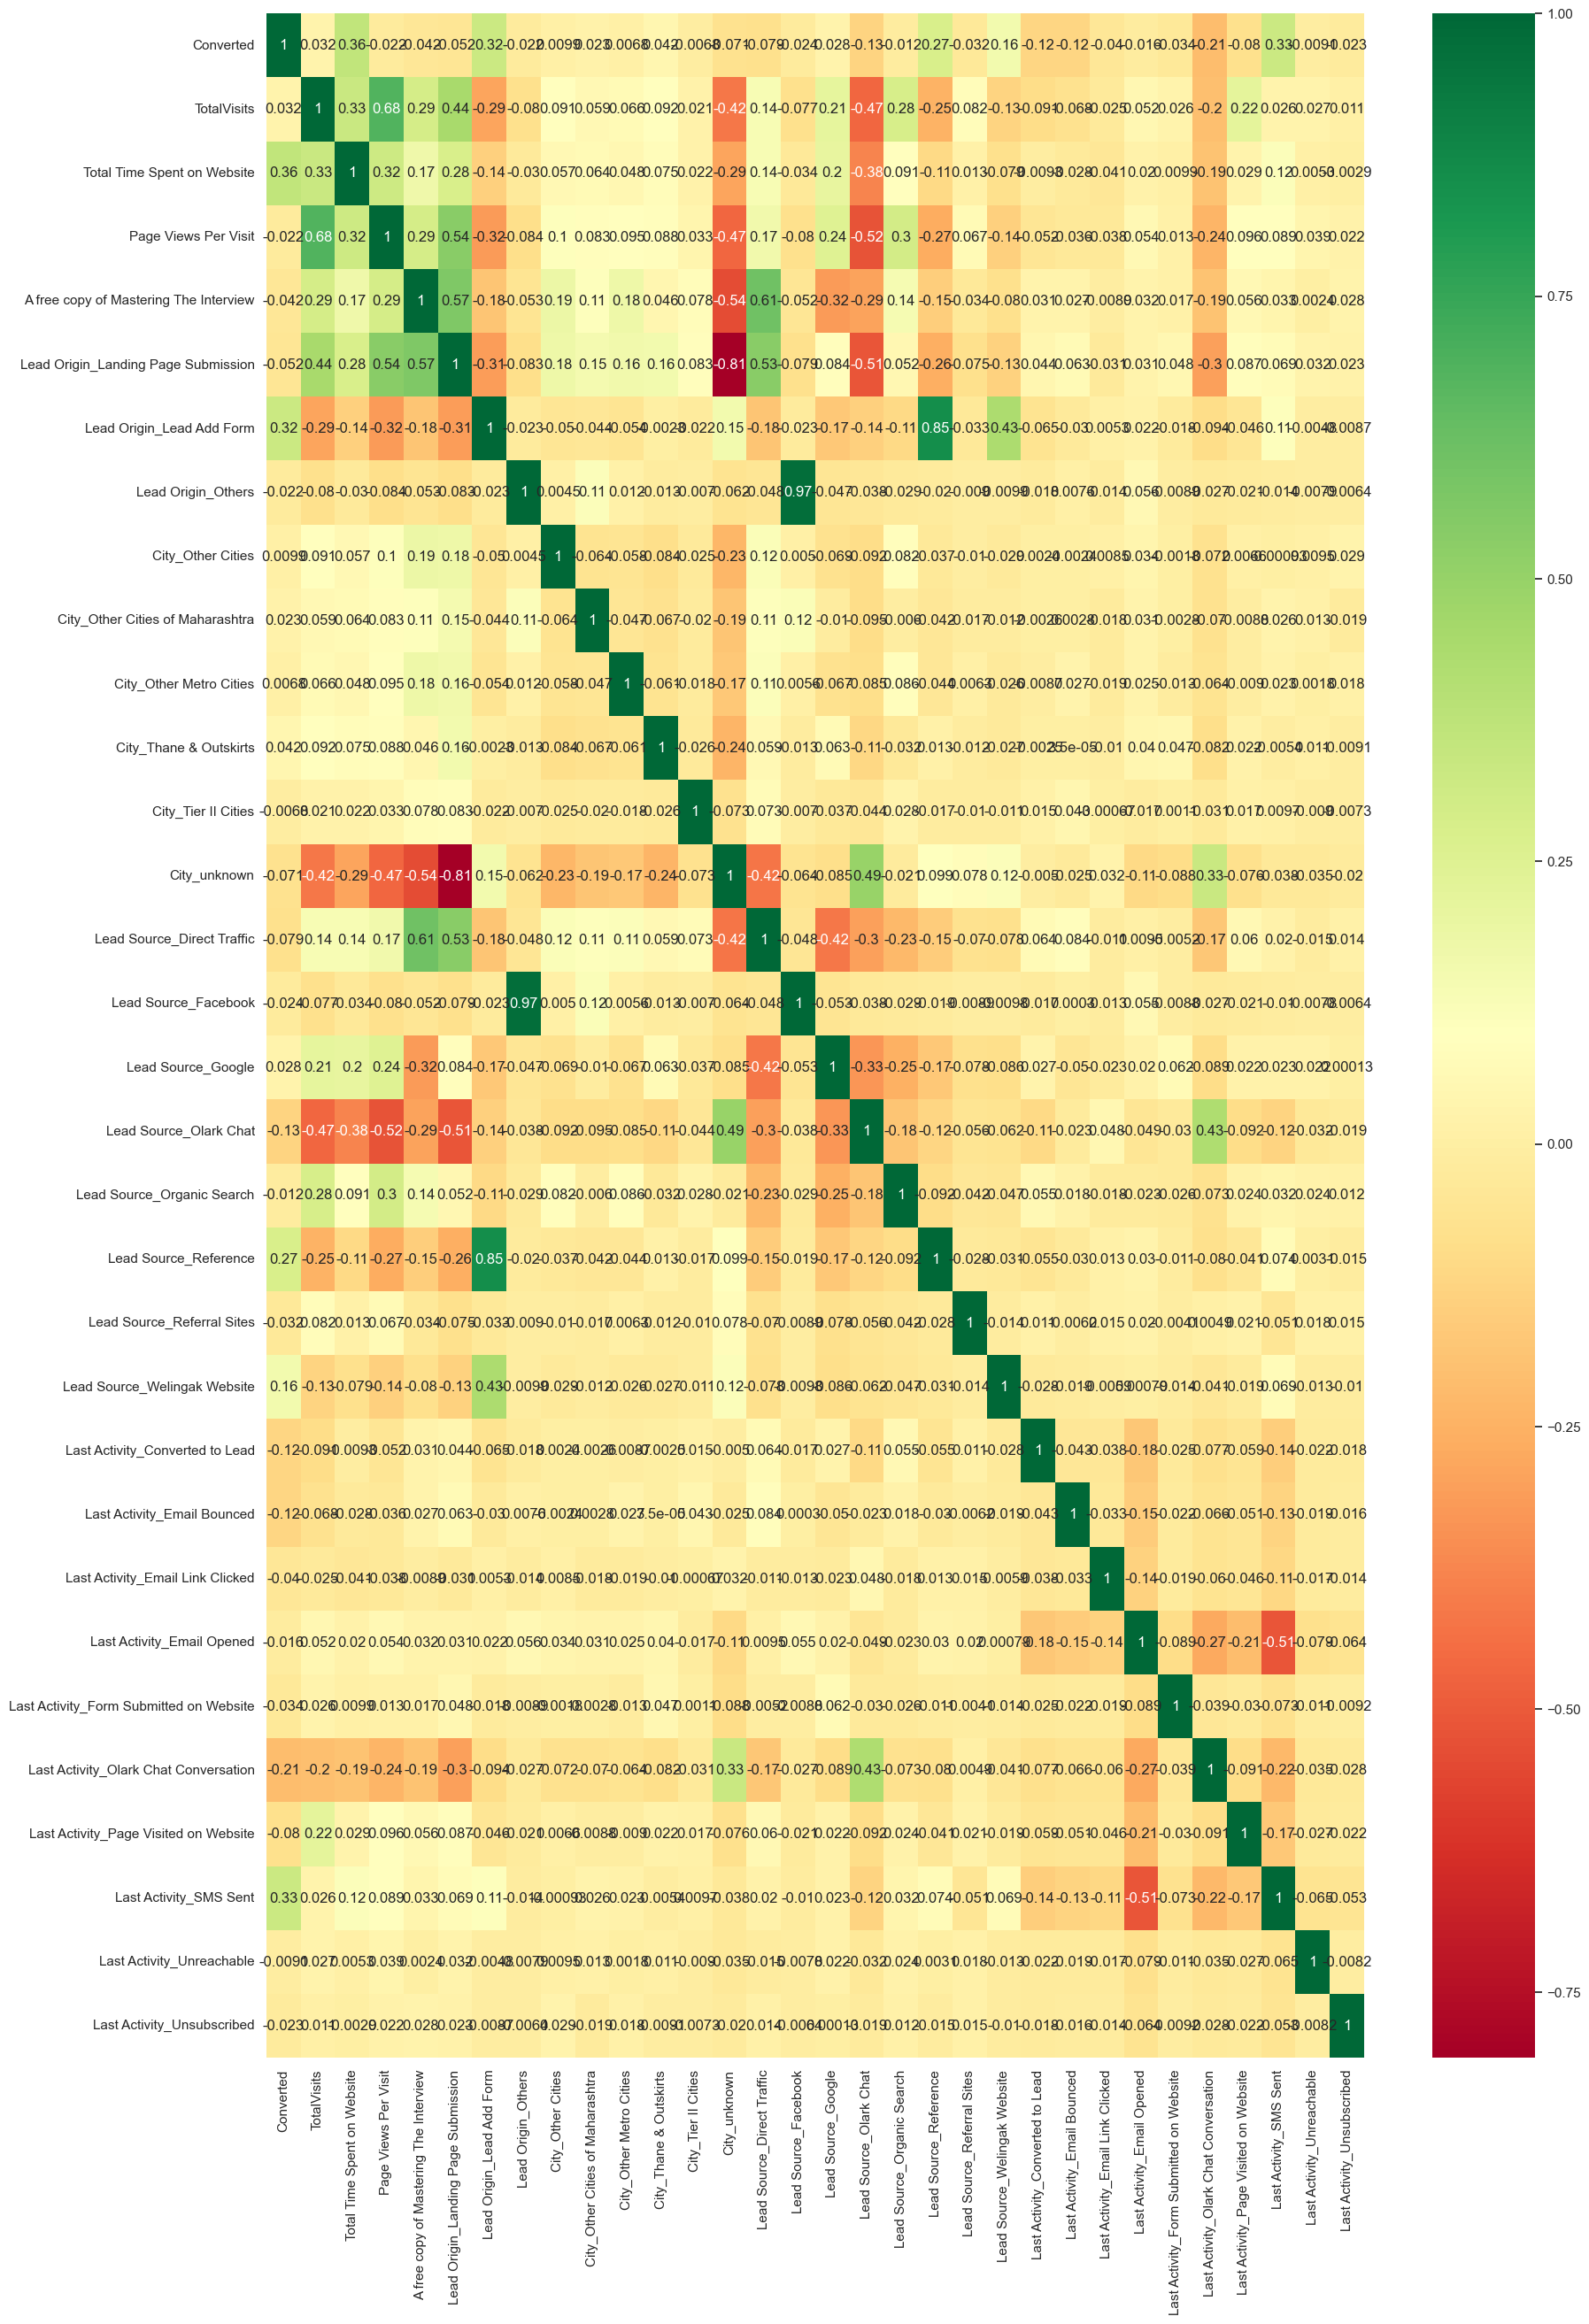

In [70]:
# Check for correlation among variables
plt.figure(figsize=(20,30))
sns.heatmap(lead.corr(),cmap = 'RdYlGn',annot=True)
plt.show()

 There is not much high correlations going on with the variables.

 # Model building
 ## Logistic Regression

In [71]:
import statsmodels.api as sm

In [72]:
x_train_sm = sm.add_constant(x_train)
logml = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logml.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2818.1
Date:                Wed, 13 Mar 2024   Deviance:                       5636.3
Time:                        20:35:21   Pearson chi2:                 6.77e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3585
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.2704      0.807      1.575      0.115      -0.310       2.851
TotalVisits                                 0.2360      0.047      5.003      0.000       0.144       0.328
Total Time Spent on Website                 1.0808      0.039     27.858      0.000       1.005       1.157
Page Views Per Visit                       -0.1775      0.051     -3.509      0.000      -0.277      -0.078
A free copy of Mastering The Interview     -0.2293      0.105     -2.188      0.029      -0.435      -0.024
Lead Origin_Landing Page Submission        -0.8382      0.141     -5.944      0.000      -1.115      -0.562
Lead Origin_Lead Add Form                   3.4822      0.679      5.132      0.000       2.152       4.812
Lead Origin_Others                         19.2963   1.22e+04      0.002      0.999   -2.38e+04    2.39e+04
City_Other Cities                           0.2069      0.130      1.589      0.112      -0.048       0.462
City_Other Cities of Maharashtra            0.2013      0.153      1.317      0.188      -0.098       0.501
City_Other Metro Cities                     0.0477      0.172      0.278      0.781      -0.289       0.384
City_Thane & Outskirts                      0.1872      0.124      1.512      0.131      -0.056       0.430
City_Tier II Cities                         0.2890      0.363      0.795      0.426      -0.423       1.001
City_unknown                               -1.0720      0.141     -7.603      0.000      -1.348      -0.796
Lead Source_Direct Traffic                 -0.2928      0.646     -0.453      0.650      -1.559       0.973
Lead Source_Facebook                      -20.7401   1.22e+04     -0.002      0.999   -2.39e+04    2.38e+04
Lead Source_Google                         -0.0767      0.642     -0.119      0.905      -1.334       1.181
Lead Source_Olark Chat                      0.9594      0.652      1.470      0.141      -0.319       2.238
Lead Source_Organic Search                 -0.2299      0.649     -0.354      0.723      -1.502       1.043
Lead Source_Reference                       0.0113      0.913      0.012      0.990      -1.778       1.800
Lead Source_Referral Sites                  0.0405      0.707      0.057      0.954      -1.345       1.426
Lead Source_Welingak Website                2.6342      1.352      1.948      0.051      -0.016       5.285
Last Activity_Converted to Lead            -2.3571      0.509     -4.629      0.000      -3.355      -1.359
Last Activity_Email Bounced                -3.4851      0.576     -6.051      0.000      -4.614      -2.356
Last Activity_Email Link Clicked           -1.9336      0.513     -3.771      0.000      -2.939      -0.929
Last Activity_Email Opened                 -1.3695      0.4

Looks like we have high p-values which can be eliminated using rfe and manual fine tuning.

## Feature Selection using RFE

In [73]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [74]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=10)             
rfe = rfe.fit(x_train, y_train)

In [75]:
rfe.support_

array([False,  True, False, False,  True,  True, False, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False])

In [76]:
rfe.ranking_

array([10,  1, 11,  8,  1,  1,  7, 13, 15, 22, 14, 12,  1, 16,  1, 18,  1,
       17,  6, 19,  1,  2,  1,  5, 20,  3,  1,  4,  1, 21,  9])

In [77]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('A free copy of Mastering The Interview', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Others', False, 7),
 ('City_Other Cities', False, 13),
 ('City_Other Cities of Maharashtra', False, 15),
 ('City_Other Metro Cities', False, 22),
 ('City_Thane & Outskirts', False, 14),
 ('City_Tier II Cities', False, 12),
 ('City_unknown', True, 1),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 2),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 5),
 ('Last Activ

In [78]:
col = x_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'City_unknown', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent'],
      dtype='object')

In [79]:
x_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Others',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed'],
      dtype='object')

## Using statsmodel, for the detailed statistics

#### Assessing the model with statmodels

#### Running the first training model

In [80]:
import statsmodels.api as sm

#### no of features=10

#### Model 1

In [81]:
#logm1
x_train_sm = sm.add_constant(x_train[col])
logm1 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2878.2
Date:                Wed, 13 Mar 2024   Deviance:                       5756.5
Time:                        20:35:34   Pearson chi2:                 6.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3462
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2860      0.128     -2.241      0.025      -0.536      -0.036
Total Time Spent on Website               1.0928      0.038     28.562      0.000       1.018       1.168
Lead Origin_Landing Page Submission      -1.0610      0.132     -8.015      0.000      -1.321      -0.802
Lead Origin_Lead Add Form                 3.6069      0.200     17.999      0.000       3.214       4.000
City_unknown                             -1.1717      0.127     -9.205      0.000      -1.421      -0.922
Lead Source_Facebook                     -1.3076      0.518     -2.525      0.012      -2.323      -0.293
Lead Source_Olark Chat                    1.0989      0.118      9.322      0.000       0.868       1.330
Lead Source_Welingak Website              2.6587      1.032      2.576      0.010       0.636       4.681
Last Activity_Email Bounced              -1.9769      0.327     -6.043      0.000      -2.618      -1.336
Last Activity_Olark Chat Conversation    -1.3572      0.159     -8.547      0.000      -1.668      -1.046
Last Activity_SMS Sent                    1.3255      0.071     18.743      0.000       1.187       1.464
=========================================================================================================
"""

Dropping Lead Source_Facebook

In [82]:
col=col.drop('Lead Source_Facebook',1)

#### function to calculate vif

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,City_unknown,2.16
4,Lead Source_Olark Chat,2.04
8,Last Activity_SMS Sent,1.55
2,Lead Origin_Lead Add Form,1.47
7,Last Activity_Olark Chat Conversation,1.47
1,Lead Origin_Landing Page Submission,1.39
5,Lead Source_Welingak Website,1.27
0,Total Time Spent on Website,1.22
6,Last Activity_Email Bounced,1.07


#### Model 2

In [85]:
#logm2
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2882.1
Date:                Wed, 13 Mar 2024   Deviance:                       5764.1
Time:                        20:35:34   Pearson chi2:                 6.66e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3454
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3845      0.121     -3.169      0.002      -0.622      -0.147
Total Time Spent on Website               1.0999      0.038     28.793      0.000       1.025       1.175
Lead Origin_Landing Page Submission      -0.9655      0.127     -7.628      0.000      -1.214      -0.717
Lead Origin_Lead Add Form                 3.6543      0.200     18.310      0.000       3.263       4.045
City_unknown                             -1.0928      0.123     -8.886      0.000      -1.334      -0.852
Lead Source_Olark Chat                    1.1352      0.117      9.689      0.000       0.906       1.365
Lead Source_Welingak Website              2.6483      1.032      2.565      0.010       0.625       4.672
Last Activity_Email Bounced              -2.0144      0.328     -6.142      0.000      -2.657      -1.372
Last Activity_Olark Chat Conversation    -1.3547      0.159     -8.535      0.000      -1.666      -1.044
Last Activity_SMS Sent                    1.3224      0.071     18.713      0.000       1.184       1.461
=========================================================================================================
"""

Dropping Lead Source_Welingak Website.

In [86]:
col=col.drop('Lead Source_Welingak Website',1)

#### function to calculate vif

In [87]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,City_unknown,2.15
4,Lead Source_Olark Chat,2.04
7,Last Activity_SMS Sent,1.55
6,Last Activity_Olark Chat Conversation,1.47
1,Lead Origin_Landing Page Submission,1.39
2,Lead Origin_Lead Add Form,1.23
0,Total Time Spent on Website,1.22
5,Last Activity_Email Bounced,1.07


#### Model 3

In [88]:
#logm3
x_train_sm = sm.add_constant(x_train[col])
logm3 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2889.5
Date:                Wed, 13 Mar 2024   Deviance:                       5779.0
Time:                        20:35:34   Pearson chi2:                 6.63e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3439
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3994      0.122     -3.287      0.001      -0.638      -0.161
Total Time Spent on Website               1.0991      0.038     28.781      0.000       1.024       1.174
Lead Origin_Landing Page Submission      -0.9505      0.127     -7.504      0.000      -1.199      -0.702
Lead Origin_Lead Add Form                 3.9339      0.196     20.108      0.000       3.550       4.317
City_unknown                             -1.0728      0.123     -8.707      0.000      -1.314      -0.831
Lead Source_Olark Chat                    1.1328      0.117      9.676      0.000       0.903       1.362
Last Activity_Email Bounced              -1.9842      0.324     -6.126      0.000      -2.619      -1.349
Last Activity_Olark Chat Conversation    -1.3577      0.159     -8.549      0.000      -1.669      -1.046
Last Activity_SMS Sent                    1.3211      0.071     18.713      0.000       1.183       1.459
=========================================================================================================
"""

Finally, the p-values of all the predictor variables are 0

#### function to calculate vif

In [89]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,City_unknown,2.15
4,Lead Source_Olark Chat,2.04
7,Last Activity_SMS Sent,1.55
6,Last Activity_Olark Chat Conversation,1.47
1,Lead Origin_Landing Page Submission,1.39
2,Lead Origin_Lead Add Form,1.23
0,Total Time Spent on Website,1.22
5,Last Activity_Email Bounced,1.07


Finally we have arrived with low values of VIFs which is significant for prediction.

# Creating Prediction

In [90]:
# getting predicted values on train set
y_train_pred=res.predict(x_train_sm)
y_train_pred[:10]

Lead Number
657224    0.125270
603146    0.035609
649181    0.182444
591076    0.426930
628982    0.722655
605788    0.094608
592929    0.064622
624860    0.113955
619894    0.704529
660203    0.132668
dtype: float64

these are the probabilities on train set

In [91]:
# reshaping the train set values
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1252703 , 0.03560936, 0.18244369, 0.42692997, 0.7226549 ,
       0.09460763, 0.06462214, 0.1139552 , 0.70452854, 0.13266831])

#### Creating the dataframe with actual Converted flag and predicted probabilites

In [92]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Conversion_prob':y_train_pred})
y_train_pred_final['Lead Number']=y_train.index
y_train_pred_final.head()

,Converted,Conversion_prob,Lead Number
0,0,0.125270,657224
1,0,0.035609,603146
2,0,0.182444,649181
3,0,0.426930,591076
4,1,0.722655,628982


#### Creating new column' predicted' with 1 if conversion_prob > 0.5 else 0

In [93]:
y_train_pred_final['predicted']=y_train_pred_final.Conversion_prob.map(lambda x:1 if x >0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Lead Number,predicted
0,0,0.125270,657224,0
1,0,0.035609,603146,0
2,0,0.182444,649181,0
3,0,0.426930,591076,0
4,1,0.722655,628982,1


# Model Evaluation

In [94]:
from sklearn import metrics

In [95]:
#Confusion Matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
confusion

array([[3425,  510],
       [ 784, 1644]], dtype=int64)

In [96]:
# Predicted     converted   not converted
# Actual
# converted              3425       510
#not converted            784      1644

In [97]:
# Checking overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.7966368065377967


The overall Accuracy is nearly 80% which is significant.

#### Metrics beyond simply accuracy

In [98]:
#  value of true positive - TP
TP = confusion[1,1]
# value of true negatives - TN
TN = confusion[0,0]
#  value of false positives - FP
FP = confusion[0,1] 
# value of false negatives - FN
FN = confusion[1,0]

In [99]:
# Calculating the sensitivity
TP/(TP+FN)

0.6771004942339374

In [100]:
# Calculating the specificity
TN/(TN+FP)

0.8703939008894537

After running the model on the Train Data these are the Values we obtain:

Accuracy : 80%  
Sensitivity value is 68%  
Specificity value is 87%

In [101]:
# Calculate false postive rate -
print(FP/ float(TN+FP))

0.12960609911054638


In [102]:
# positive predictive value 
print (TP / float(TP+FP))

0.7632311977715878


In [103]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8137324780232834


# Plotting the ROC curve

In [104]:
# Creating the function for drawing ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Conversion_prob'], drop_intermediate = False )

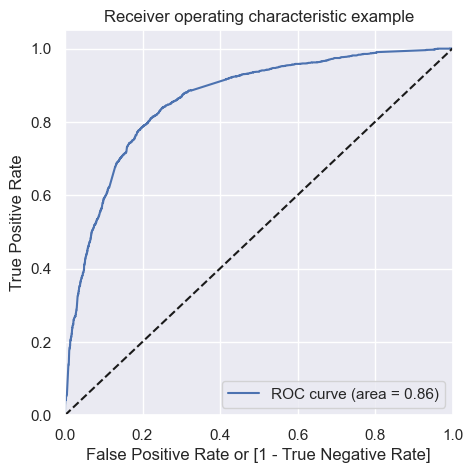

In [106]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Conversion_prob'])

The ROC Curve should be a value close to 1. We are getting a good value of 1 indicating a good predictive model.

# Finding optimal cutoff point

#### Optimal cutoff probability is the probability where there is a balance between specificity and sensitivity.

In [107]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Conversion_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.125270,657224,0,1,1,0,0,0,0,0,0,0,0
1,0,0.035609,603146,0,1,0,0,0,0,0,0,0,0,0
2,0,0.182444,649181,0,1,1,0,0,0,0,0,0,0,0
3,0,0.426930,591076,0,1,1,1,1,1,0,0,0,0,0
4,1,0.722655,628982,1,1,1,1,1,1,1,1,1,0,0


In [108]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.381581     1.000000     0.000000
0.1          0.1  0.547540     0.976524     0.282846
0.2          0.2  0.705013     0.920511     0.572046
0.3          0.3  0.779821     0.843904     0.740280
0.4          0.4  0.796165     0.759473     0.818806
0.5          0.5  0.796637     0.677100     0.870394
0.6          0.6  0.771020     0.540362     0.913342
0.7          0.7  0.756090     0.455931     0.941296
0.8          0.8  0.726073     0.340610     0.963914
0.9          0.9  0.687254     0.202636     0.986277


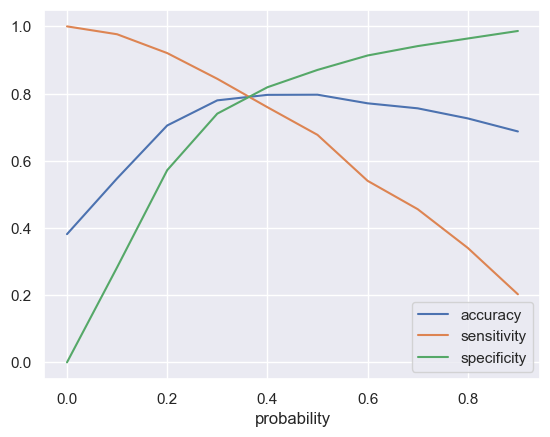

In [109]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

 From the curve above, 0.36 is the optimum point to take it as a cutoff probability.

In [110]:
# Adding a new column named final_predicted created using the optimal cutoff 0.36
y_train_pred_final['final_Predicted'] = y_train_pred_final.Conversion_prob.map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.125270,657224,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.035609,603146,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.182444,649181,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.426930,591076,0,1,1,1,1,1,0,0,0,0,0,1
4,1,0.722655,628982,1,1,1,1,1,1,1,1,1,0,0,1


# Precision and Recall

Precision  
  TP/TP+FP

In [111]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7632311977715878

Recall  
TP/TP+FN

In [112]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6771004942339374

In [113]:
from sklearn.metrics import precision_score, recall_score

In [114]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7632311977715878

In [115]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6771004942339374

## Precision and Recall tradeoff

In [116]:
from sklearn.metrics import precision_recall_curve

In [117]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    1
 6361    1
 6362    0
 Name: Converted, Length: 6363, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    0
 6361    1
 6362    0
 Name: predicted, Length: 6363, dtype: int64)

In [118]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

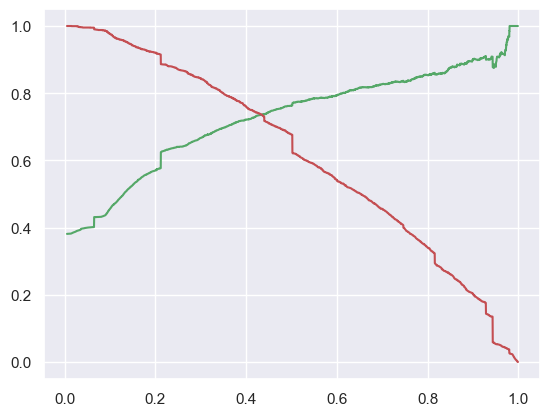

In [119]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The graph above showing a good tradeoff between precision and recall. The cutoff is 0.42

# Making predictions on test set

In [120]:
#Scaling the features
x_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=scaler.fit_transform(x_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
x_test=x_test[col]
x_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,City_unknown,Lead Source_Olark Chat,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent
Lead Number,,,,,,,,
596625,1.891958,1,0,0,0,0,0,1
641392,-0.542475,1,0,0,0,0,0,1
652477,-0.790628,0,0,1,0,0,0,0
616581,-0.618551,1,0,0,0,0,0,0
580888,2.359282,1,0,0,0,0,0,0


In [121]:
x_test_sm=sm.add_constant(x_test)

#### Since model was already trained, let's make predictions on the test set

In [122]:
y_test_pred = res.predict(x_test_sm)
y_test_pred[:10]

Lead Number
596625    0.886002
641392    0.348635
652477    0.087769
616581    0.116116
580888    0.776099
612711    0.476835
637395    0.169415
649156    0.082348
581132    0.097368
595853    0.899877
dtype: float64

In [123]:
#Converting y_pred to a dataframe
y_pred_test=pd.DataFrame(y_test_pred)
y_pred_test[:10]

,0
Lead Number,
596625,0.886002
641392,0.348635
652477,0.087769
616581,0.116116
580888,0.776099
612711,0.476835
637395,0.169415
649156,0.082348
581132,0.097368


In [124]:
#Converting y_test to a dataframe
y_test_df=pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index

In [125]:
# Removing index for both dataframes to append them side by side 
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)
y_pred_final.head()


,Converted,Lead Number,0
0,1,596625,0.886002
1,0,641392,0.348635
2,0,652477,0.087769
3,0,616581,0.116116
4,1,580888,0.776099


In [126]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_prob'})
y_pred_final.head()

,Converted,Lead Number,Conversion_prob
0,1,596625,0.886002
1,0,641392,0.348635
2,0,652477,0.087769
3,0,616581,0.116116
4,1,580888,0.776099


In [127]:
# Rearranging the columns
y_pred_final = y_pred_final[['Lead Number','Converted','Conversion_prob']]
y_pred_final['final_predicted'] = y_pred_final['Conversion_prob'].map( lambda x: 1 if x > 0.36 else 0)

y_pred_final.head()

,Lead Number,Converted,Conversion_prob,final_predicted
0,596625,1,0.886002,1
1,641392,0,0.348635,0
2,652477,0,0.087769,0
3,616581,0,0.116116,0
4,580888,1,0.776099,1


In [128]:
#Checking overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7891455812247892

In [129]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final['final_predicted'] )
confusion2

array([[1303,  357],
       [ 218,  849]], dtype=int64)

In [130]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [131]:
# sensitivity
TP / float(TP+FN)

0.795688847235239

In [132]:
# Specificity
TN/ float(TN+FP)

0.7849397590361445

After running the model on the Test Data these are the values we obtained

Accuracy : 80%   
Sensitivity : 80%   
Specificity : 78%  

# Assigning Lead Score with respect to Lead Number

In [133]:
y_pred_final['Lead_Score'] = y_pred_final['Conversion_prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Lead Number,Converted,Conversion_prob,final_predicted,Lead_Score
0,596625,1,0.886002,1,89
1,641392,0,0.348635,0,35
2,652477,0,0.087769,0,9
3,616581,0,0.116116,0,12
4,580888,1,0.776099,1,78


In [134]:

matching_values = y_pred_final[(y_pred_final['final_predicted']==1)]
matching_values

,Lead Number,Converted,Conversion_prob,final_predicted,Lead_Score
0,596625,1,0.886002,1,89
4,580888,1,0.776099,1,78
5,612711,1,0.476835,1,48
9,595853,1,0.899877,1,90
11,630462,1,0.650937,1,65
...,...,...,...,...,...
2719,605262,1,0.943547,1,94
2720,588865,1,0.885800,1,89
2721,592959,1,0.835841,1,84
2723,644065,1,0.386273,1,39


Finally,we have added Lead score which will be used by the X education company.  
Lead score from (0 to 100) being assigned to the customers.

#### Final Observation:  
Let us compare the values obtained for Train & Test:  

Train Data:   
Accuracy    : 80%  
Sensitivity : 68%  
Specificity : 87% 

Test Data:   
Accuracy    : 80%  
Sensitivity : 80%  
Specificity : 78%  

- Both the training and test accuracies are the same at 80%. This suggests that the model is predicting correctly on 80% of the instances in both datasets.  
- The sensitivity is higher in the test data (80%) compared to the training data (68%), indicating that the model performs better at correctly identifying positive cases in the test dataset.  
- The specificity is higher in the training data (87%) compared to the test data (78%), indicating that the model performs better at correctly identifying negative cases in the training dataset.

## Conclusion:  
- Important factors that are useful for lead conversion are
  - Total Time Spent on Website
  - Lead Origin -  Landing Page submission, Lead add form.
  - Last Activity - SMS Sent,Olark Chat Conversation,E.mail Bounced.
  - Lead Source_Olark Chat.
- Based on Accuracy, specificity and sensitivity we obtained, model's performance seems to be good. Thus our model gives better predictions.
- Total Leads Predicted as Likely to Convert is 1206 and Number of Converted Leads among those Predicted as Likely to Convert is 849.
- Conversion rate we predicted is 70% which is good when compared to the original 30% conversion rate.